In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px

In [3]:
df = pd.read_csv('../data/Pesquisa Datafolha (Folha de SP 21-03-2024) Avaliação Governos - Pesquisa Datafolha (Folha de SP 21-03-2024) Avaliação Governos.csv')
df

,Governo,Data da pesquisa,Ótimo/Bom,Regular,Ruim/Péssimo,Não sabe
0,Lula 3,em 20/03/2024,35,30,33,2
1,Fernando Collor,de 04 a 06/03/1991,23,40,34,3
2,Itamar Franco,14 e 15/12/1993,18,45,34,3
3,FHC 1,em 15/12/1995,41,40,15,4
4,FHC 2,de 14 a 16/03/2000,18,37,43,2
5,Lula 1,em 01/04/2004,38,43,17,2
6,Lula 2,de 25 a 27/03/2008,55,33,11,1
7,Dilma 1,18 e 19/04/2012,64,29,5,1
8,Dilma 2,17 e 18/03/2016,10,21,69,1
9,Temer,27 e 28/09/2017,5,20,73,2


# Manipulação da coluna Data da pesquisa
---

|Considerando apenas a data final da pesquisa como válida|
----------------------------------------------------------

In [4]:
df.loc[0, 'Data da pesquisa'] = df.loc[0, 'Data da pesquisa'].replace('em ', '')
df.loc[3, 'Data da pesquisa'] = df.loc[3, 'Data da pesquisa'].replace('em ', '')
df.loc[5, 'Data da pesquisa'] = df.loc[5, 'Data da pesquisa'].replace('em ', '')
df.loc[10, 'Data da pesquisa'] = df.loc[10, 'Data da pesquisa'].replace('em ', '')


In [5]:
df.loc[1, 'Data da pesquisa'] = df.loc[1, 'Data da pesquisa'].replace('de 04 a ', '')
df.loc[2, 'Data da pesquisa'] = df.loc[2, 'Data da pesquisa'].replace('14 e ', '')
df.loc[4, 'Data da pesquisa'] = df.loc[4, 'Data da pesquisa'].replace('de 14 a ', '')
df.loc[6, 'Data da pesquisa'] = df.loc[6, 'Data da pesquisa'].replace('de 25 a ', '')
df.loc[7, 'Data da pesquisa'] = df.loc[7, 'Data da pesquisa'].replace('18 e ', '')
df.loc[8, 'Data da pesquisa'] = df.loc[8, 'Data da pesquisa'].replace('17 e ', '')
df.loc[9, 'Data da pesquisa'] = df.loc[9, 'Data da pesquisa'].replace('27 e ', '')

In [6]:
df

,Governo,Data da pesquisa,Ótimo/Bom,Regular,Ruim/Péssimo,Não sabe
0,Lula 3,20/03/2024,35,30,33,2
1,Fernando Collor,06/03/1991,23,40,34,3
2,Itamar Franco,15/12/1993,18,45,34,3
3,FHC 1,15/12/1995,41,40,15,4
4,FHC 2,16/03/2000,18,37,43,2
5,Lula 1,01/04/2004,38,43,17,2
6,Lula 2,27/03/2008,55,33,11,1
7,Dilma 1,19/04/2012,64,29,5,1
8,Dilma 2,18/03/2016,10,21,69,1
9,Temer,28/09/2017,5,20,73,2


# Pré-processamento
---

In [7]:
# Convertendo a coluna 'Data da pesquisa' para o tipo datetime
df['Data da pesquisa'] = pd.to_datetime(df['Data da pesquisa'], dayfirst=True, errors='coerce')

# Ordenando o DataFrame pela data
df.sort_values(by='Data da pesquisa', inplace=True)

# Gráfico de linha
---

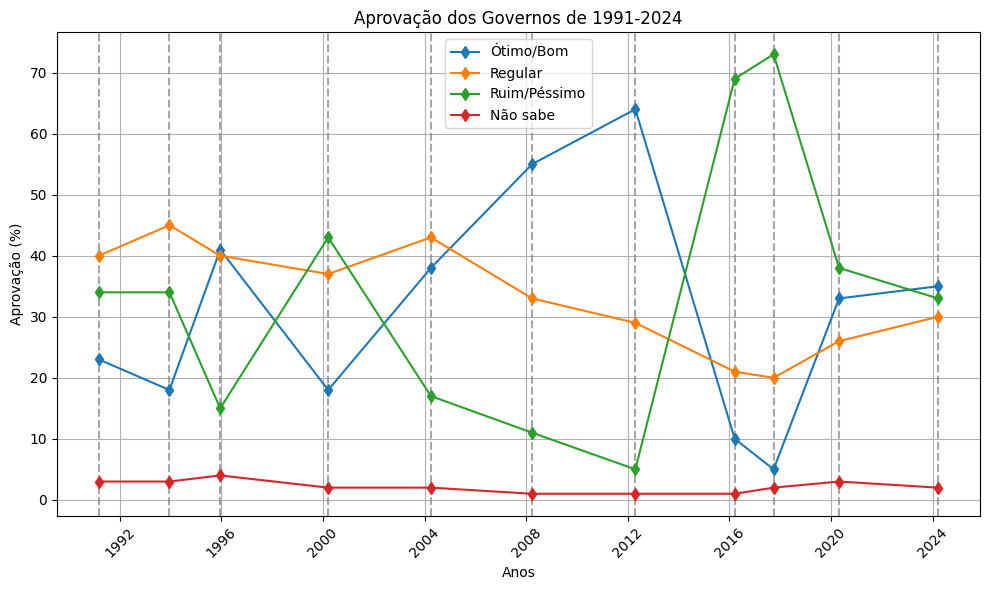

In [8]:
plt.figure(figsize=(10, 6))

# Adiciona as linhas verticais para cada data da pesquisa
for data in df['Data da pesquisa']:
    plt.axvline(x=data, linestyle='--', color='gray', alpha=0.7)

# Separa entre as categorias de aprovação
for coluna in ["Ótimo/Bom", "Regular", "Ruim/Péssimo", "Não sabe"]:
    plt.plot(df['Data da pesquisa'], df[coluna], marker='d', label=coluna)

# Formata o gráfico
plt.title('Aprovação dos Governos de 1991-2024')
plt.xlabel('Anos')
plt.ylabel('Aprovação (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

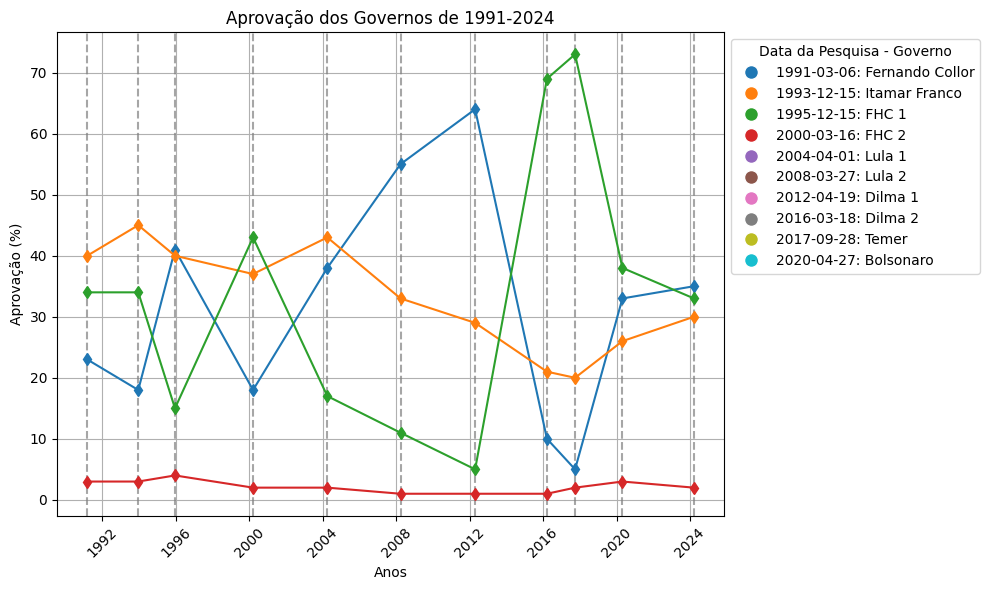

In [9]:
plt.figure(figsize=(10, 6))

# Adiciona as linhas verticais para cada data da pesquisa
for data in df['Data da pesquisa']:
    plt.axvline(x=data, linestyle='--', color='gray', alpha=0.7)

# Separa entre as categorias de aprovação
for coluna in ["Ótimo/Bom", "Regular", "Ruim/Péssimo", "Não sabe"]:
    plt.plot(df['Data da pesquisa'], df[coluna], marker='d', label=coluna)

# Adiciona as entradas da legenda personalizada
legend_labels = df.apply(lambda row: f"{row['Data da pesquisa'].strftime('%Y-%m-%d')}: {row['Governo']}", axis=1)
unique_dates = df['Data da pesquisa'].unique()
colors = plt.cm.tab10.colors[:len(unique_dates)]
legend_entries = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color) for color in colors]
plt.legend(legend_entries, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title='Data da Pesquisa - Governo')

# Formata o gráfico
plt.title('Aprovação dos Governos de 1991-2024')
plt.xlabel('Anos')
plt.ylabel('Aprovação (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


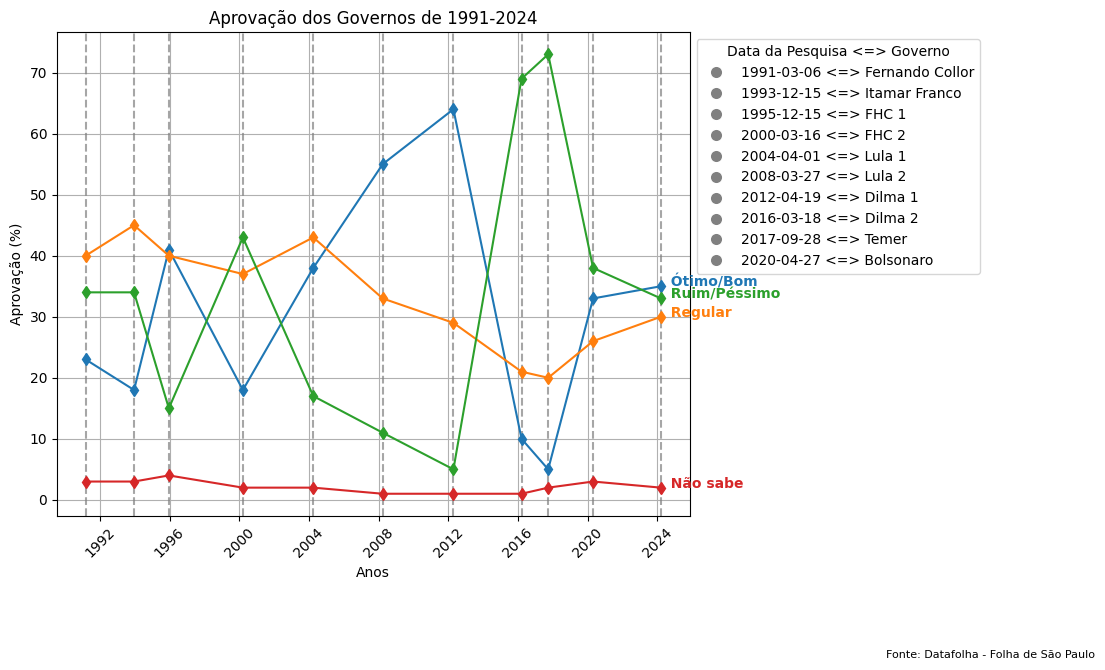

In [17]:
plt.figure(figsize=(10, 6))

# Adiciona as linhas verticais para cada data da pesquisa
for data in df['Data da pesquisa']:
    plt.axvline(x=data, linestyle='--', color='gray', alpha=0.7)

# Separa entre as categorias de aprovação
for coluna in ["Ótimo/Bom", "Regular", "Ruim/Péssimo", "Não sabe"]:
    linha = plt.plot(df['Data da pesquisa'], df[coluna], marker='d', label=coluna)
    cor_linha = linha[0].get_color()  # Obtém a cor da linha
    
    # Adiciona o nome da linha
    last_value = df[coluna].dropna().iloc[-1]
    plt.text(df.iloc[-1]['Data da pesquisa'], last_value, s='  ' + coluna, fontsize=10, ha='left', va='baseline', color=cor_linha, fontweight='bold')

# Adiciona as entradas da legenda personalizada
legend_labels = df.apply(lambda row: f"{row['Data da pesquisa'].strftime('%Y-%m-%d')} <=> {row['Governo']}", axis=1)
unique_dates = df['Data da pesquisa'].unique()
colors = plt.cm.tab10.colors[:len(unique_dates)]
legend_entries = [plt.Line2D([0], [0], marker='o', color='w', markersize=9, markerfacecolor='gray') for color in colors]
plt.legend(legend_entries, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title='Data da Pesquisa <=> Governo')

# Formata o gráfico
plt.title('Aprovação dos Governos de 1991-2024')
plt.xlabel('Anos')
plt.ylabel('Aprovação (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Adiciona a fonte fora do gráfico
plt.text(1.1, -0.1, 'Fonte: Datafolha - Folha de São Paulo', fontsize=8, ha='right', va='center', transform=plt.gcf().transFigure)

plt.show()
